<a href="https://colab.research.google.com/github/PallaviSundar/CAPSTONE-PROJECT/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Energy Consumption Forcasting in Smart Homes


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Step 1: Import & cleaning data

In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

/tmp/ipython-input-2539406040.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-2539406040.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-2539406040.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',


In [ ]:
df.shape

(32193, 7)

In [ ]:
df.isnull().sum()


,0
Global_active_power,4
Global_reactive_power,4
Voltage,4
Global_intensity,4
Sub_metering_1,4
Sub_metering_2,5
Sub_metering_3,5


In [ ]:
df = df.fillna(df.mean())
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


## Step 2: Data visualizations

/tmp/ipython-input-2481192642.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('M').mean().values[:, col])


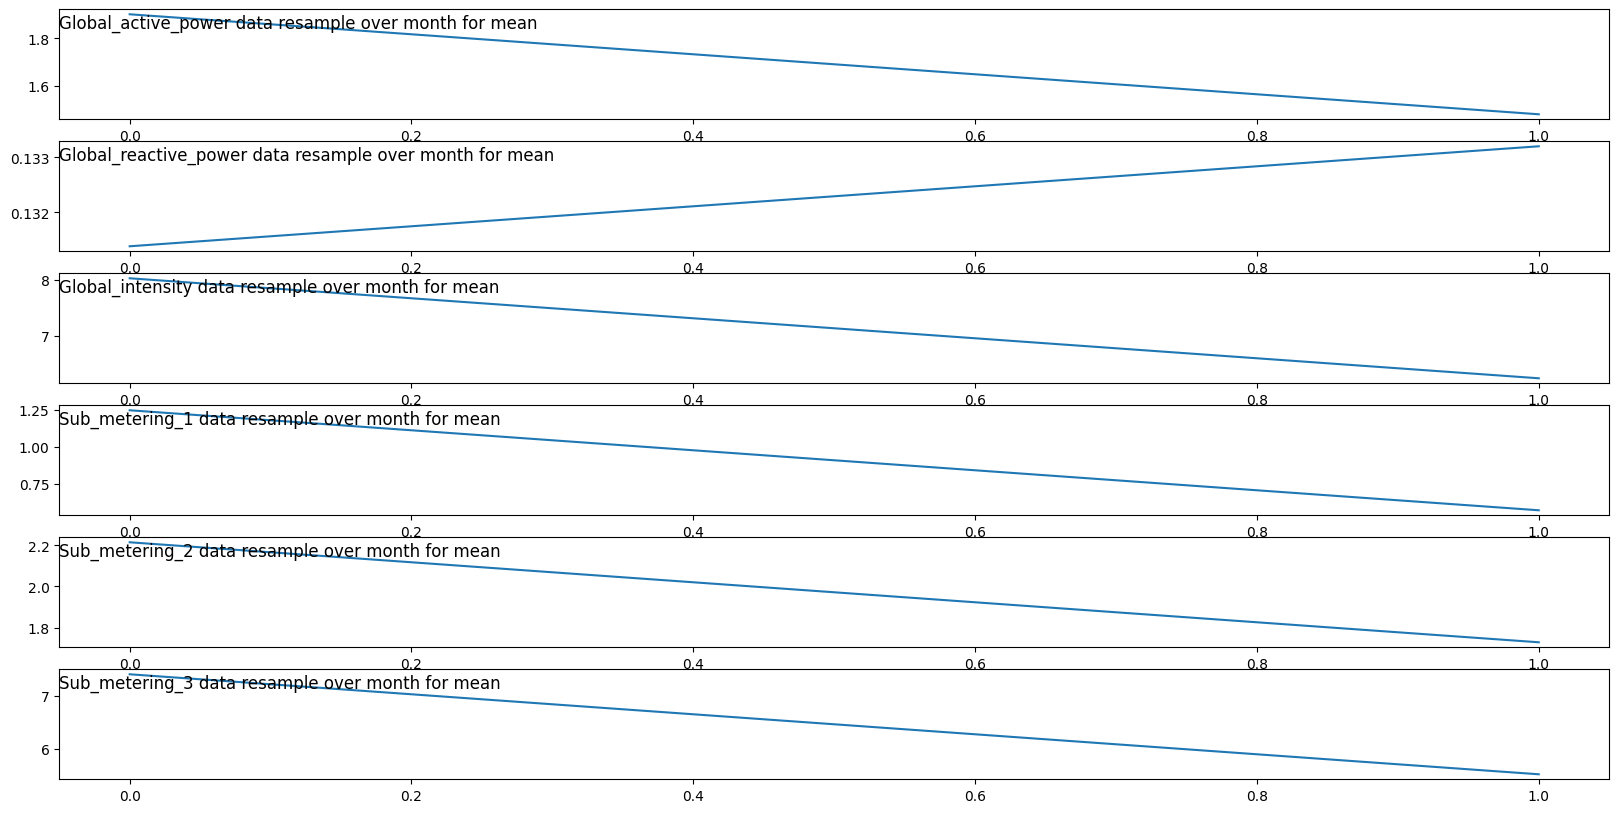

In [ ]:
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

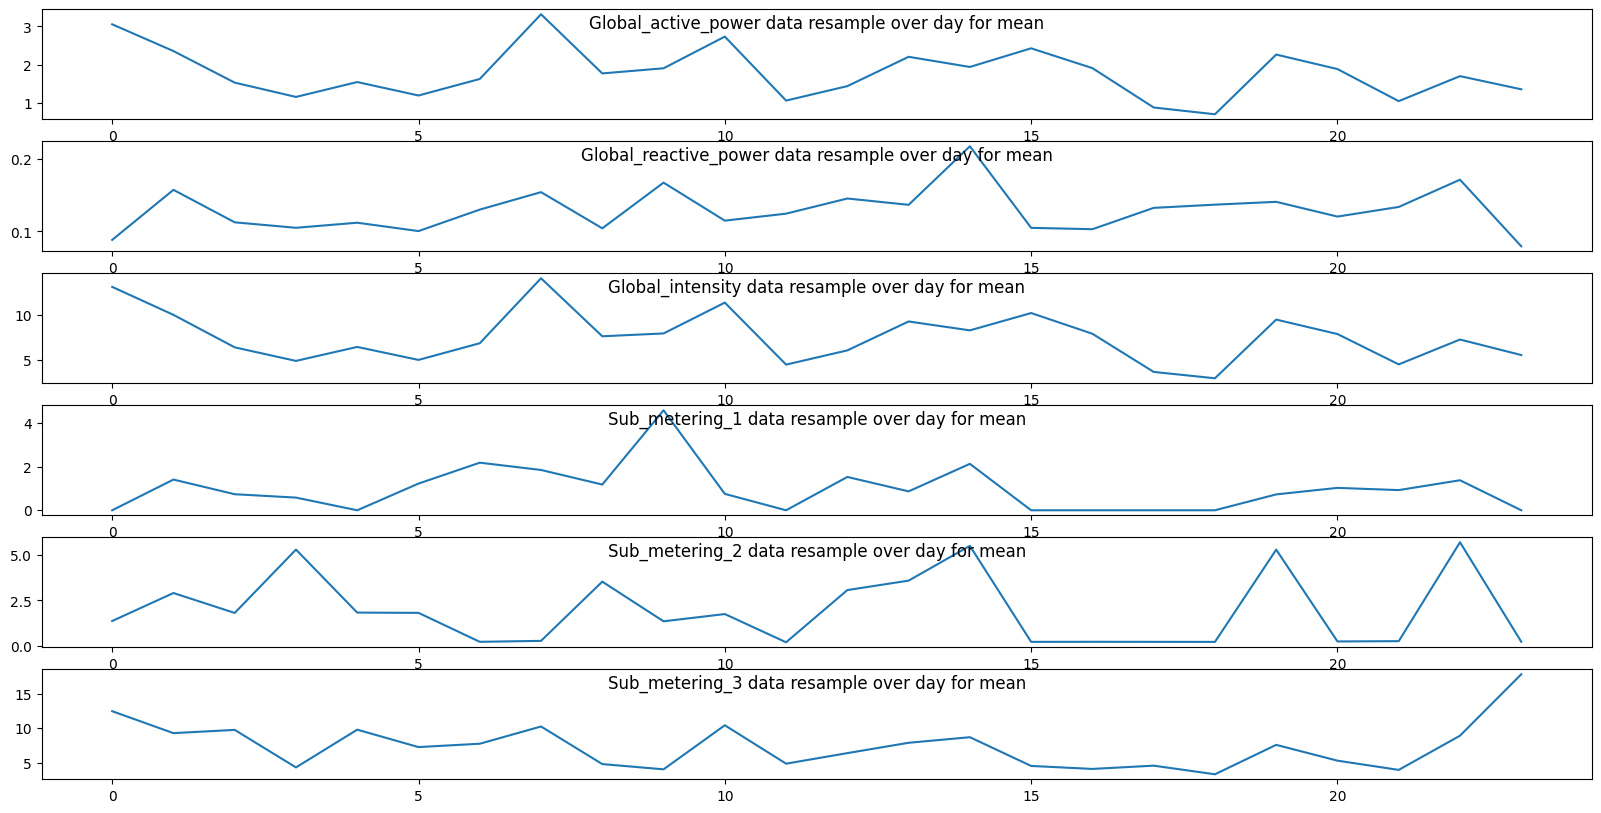

In [ ]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

/tmp/ipython-input-4089097003.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(df.resample('H').mean().values[:, col])


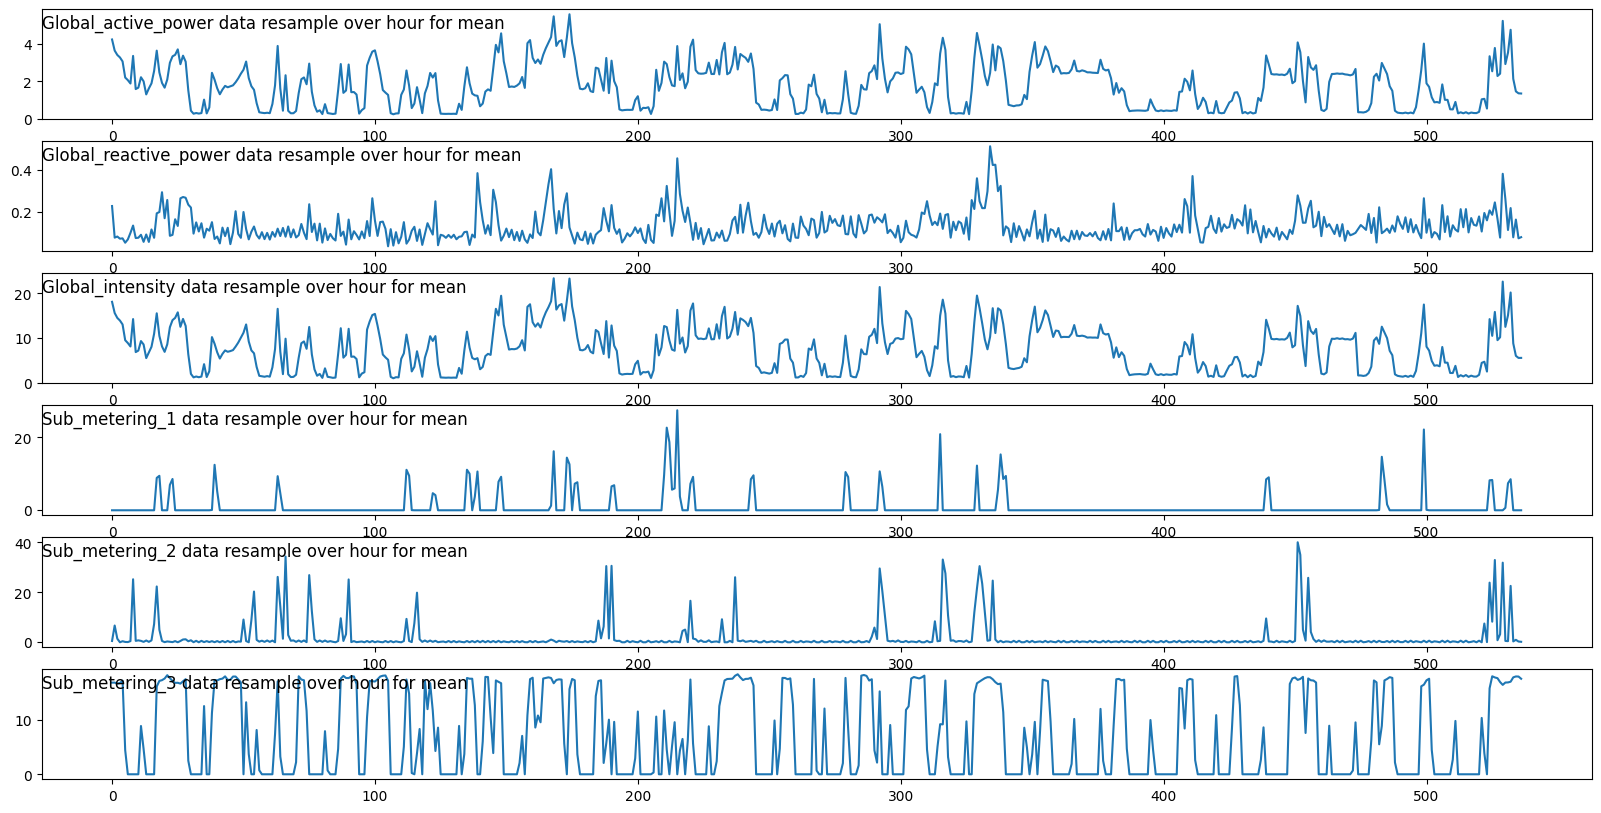

In [ ]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

## From above visualizations:
the resampling by month, date or hour is very important because it has a large interaction as expected (changing the periodicity of the system).
Therefore, if processing all the original data, the runtime will be very costly, but if processing data with large time-scale samples (e.g. monthly), it will affect the model's predictivity.
From observation, we can see, it is relatively reasonable to resample data by hour.

In [ ]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.191599,-0.614593,0.998776,0.370558,0.401472,0.521841
Global_reactive_power,0.191599,1.000000,-0.114584,0.203697,0.064796,0.148005,0.088175
Voltage,-0.614593,-0.114584,1.000000,-0.621445,-0.211584,-0.208111,-0.423485
Global_intensity,0.998776,0.203697,-0.621445,1.000000,0.375686,0.407528,0.516169
Sub_metering_1,0.370558,0.064796,-0.211584,0.375686,1.000000,0.060970,0.096076
Sub_metering_2,0.401472,0.148005,-0.208111,0.407528,0.060970,1.000000,0.112392
Sub_metering_3,0.521841,0.088175,-0.423485,0.516169,0.096076,0.112392,1.000000


From above table, it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated.

/tmp/ipython-input-1689609137.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfm = df.resample('M').mean()
/tmp/ipython-input-1689609137.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfh = df.resample('H').mean()


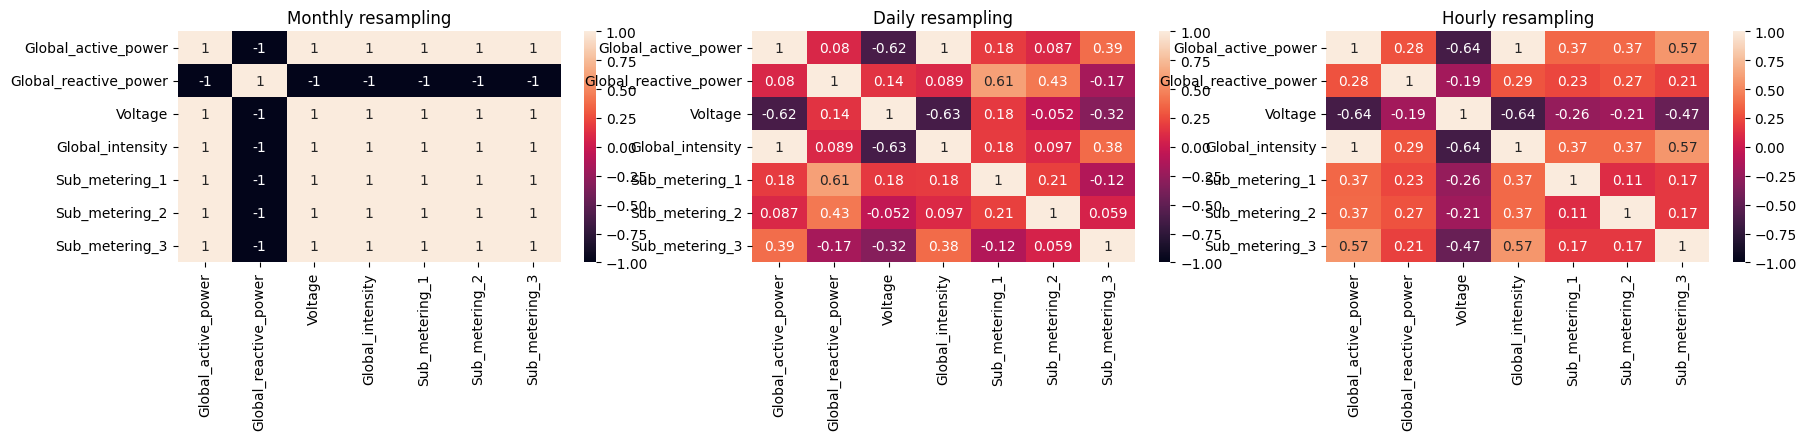

In [ ]:
import seaborn as sns
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)

ax=f.add_subplot(133)
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

It is seen from above that with resampling techniques one can change the correlations among features

Step 3: LSTM Data Preparation and fitting

The LSTM nueral network has been selected because:

###### *it is best suited for large data,
###### *time-seriers, and
###### *sequential problem.
In the first step, I will fram the problem to predict the Global_active_power.

In [ ]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In order to reduce the computation time, and also get a quick result to test the model. We have resampled the data over hour to reduce the size of data from 2075259 to 34589 (data are given in minutes).

In [ ]:
df_resample = df.resample('h').mean()
df_resample.shape

(537, 7)

So, we will have 7 input series variables and the 1 output variable for 'Global_active_power' at the current time in hour.

We also splitting the data into: train and validation sets. I select 4000 data over 34,589 dat to train, the rest will be used to test the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 400  # Adjusted train data size
if n_train_time >= len(values):
    raise ValueError("n_train_time is too large for the dataset size.")
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

## LSTM model setting


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 3s - 417ms/step - loss: 0.1075 - val_loss: 0.0581
Epoch 2/100
6/6 - 0s - 18ms/step - loss: 0.0787 - val_loss: 0.0419
Epoch 3/100
6/6 - 0s - 24ms/step - loss: 0.0557 - val_loss: 0.0321
Epoch 4/100
6/6 - 0s - 18ms/step - loss: 0.0407 - val_loss: 0.0281
Epoch 5/100
6/6 - 0s - 23ms/step - loss: 0.0333 - val_loss: 0.0286
Epoch 6/100
6/6 - 0s - 24ms/step - loss: 0.0307 - val_loss: 0.0309
Epoch 7/100
6/6 - 0s - 17ms/step - loss: 0.0304 - val_loss: 0.0322
Epoch 8/100
6/6 - 0s - 23ms/step - loss: 0.0305 - val_loss: 0.0315
Epoch 9/100
6/6 - 0s - 17ms/step - loss: 0.0295 - val_loss: 0.0298
Epoch 10/100
6/6 - 0s - 24ms/step - loss: 0.0284 - val_loss: 0.0281
Epoch 11/100
6/6 - 0s - 19ms/step - loss: 0.0271 - val_loss: 0.0269
Epoch 12/100
6/6 - 0s - 18ms/step - loss: 0.0262 - val_loss: 0.0260
Epoch 13/100
6/6 - 0s - 19ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 14/100
6/6 - 0s - 24ms/step - loss: 0.0255 - val_loss: 0.0251
Epoch 15/100
6/6 - 0s - 18ms/step - loss: 0.0256 - val_loss: 0.0249


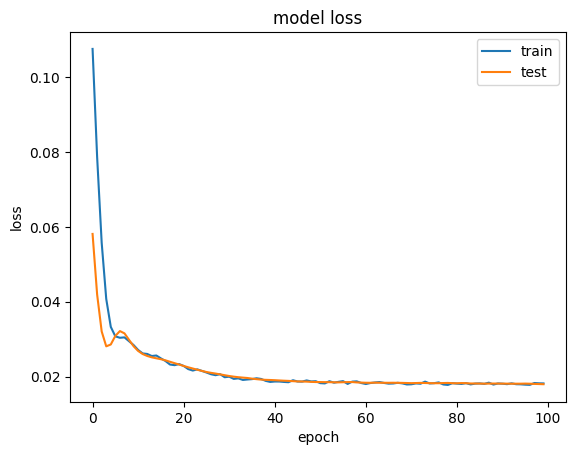

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Test RMSE: 0.713


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

And compare the actual and prediction on first 500 points of the database

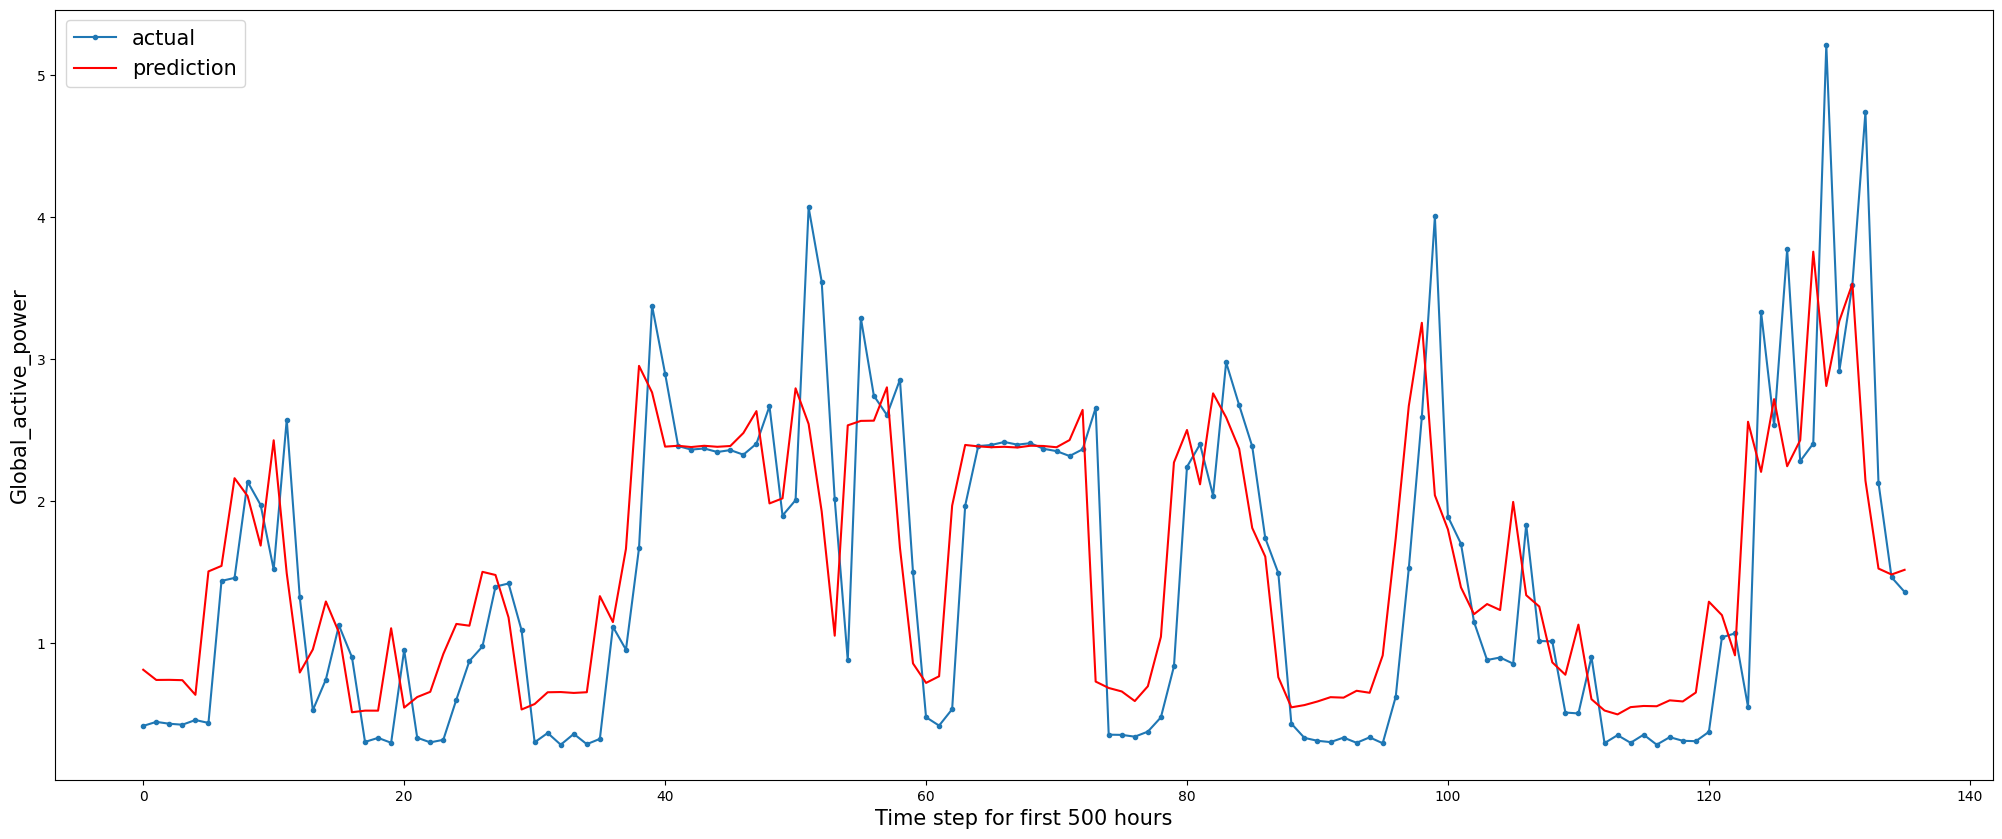

In [ ]:
aa=[x for x in range(len(inv_y))]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat, 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

let check the comparison of actual and prediction on 1000 data points from the 25,000 to 26,000.

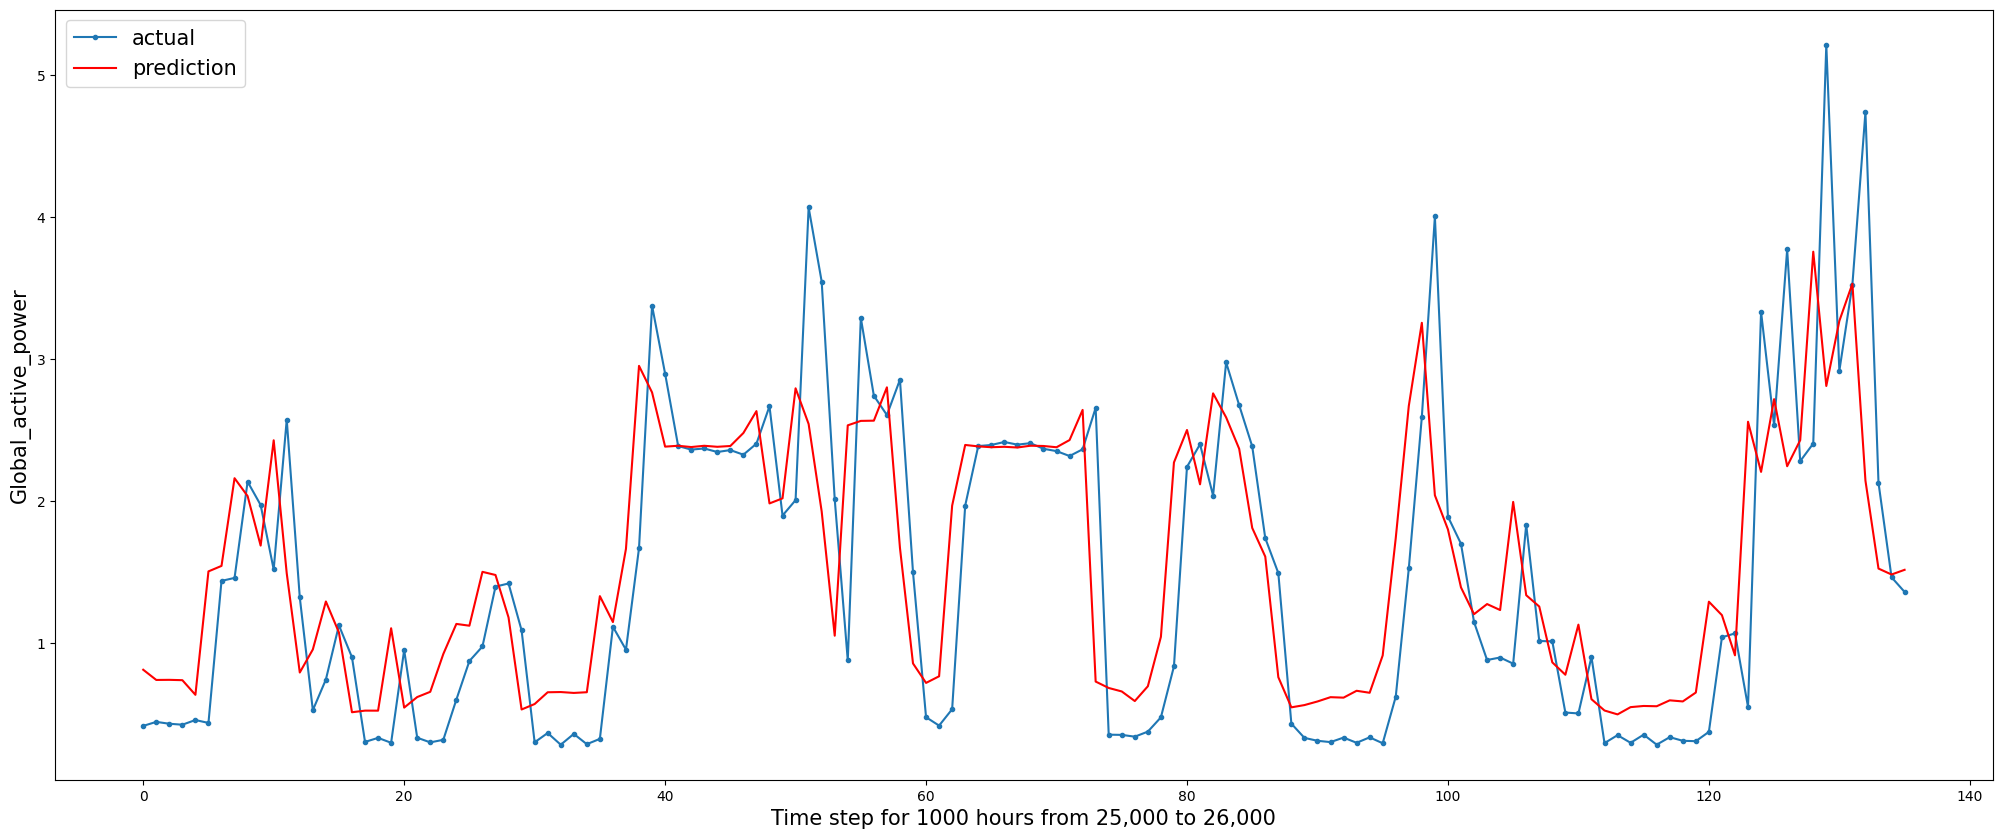

In [ ]:
aa=[x for x in range(len(inv_y))]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y, marker='.', label="actual")
plt.plot(aa, inv_yhat, 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 25,000 to 26,000', size=15)
plt.legend(fontsize=15)
plt.show()